In [1]:
import pandas as pd
import px_reader as px
from helpers import *
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
nb_bourses = read_file('nb-bourses.px')
nb_bourses.index.names = ['annee', 'region', 'sexe']
nb_bourses.head()

Moins de 15 ans 15-19 ans 20-24 ans 25-29 ans  \
annee region       sexe                                                  
2004  Suisse       Homme             116      9599      8291      3635   
                   Femme             137     11896      9554      3146   
      Zurich       Homme              66       601       527       385   
                   Femme              84       699       607       354   
      Bern / Berne Homme               1      2174      1024       271   

                         30 ans ou plus  
annee region       sexe                  
2004  Suisse       Homme           1504  
                   Femme           1618  
      Zurich       Homme            213  
                   Femme            278  
      Bern / Berne Homme             78

In [31]:
type_region = list(nb_bourses.index.get_level_values('region').unique())
years = list(nb_bourses.index.get_level_values('annee').unique())

In [32]:
def merge_sexe(df):
    for y in years:
        for c in type_region:
            df.loc[(y, c, 'Homme')] =  df.loc[(y,c, 'Homme')].astype(int) + df.loc[(y, c, 'Femme')].astype(int)
    
    #df['Total'] =  df[df.columns].values.sum(axis=1)
    df = df.drop('Femme', level = 'sexe')
    df = df.reset_index(level=2)
    df = df.drop('sexe', axis =1)
    return df

In [33]:
def process_df(nb_bourses):
    nb_bourses = parse_df(nb_bourses, 3)
    bourses = merge_sexe(nb_bourses)
    bourses['Total'] = bourses[bourses.columns].sum(axis = 1)
    return bourses

In [34]:
bourse = process_df(nb_bourses)
bourse.head()

Moins de 15 ans 15-19 ans 20-24 ans  25-29 ans  \
annee region                                                        
2004  Suisse                   253     21495     17845     6781.0   
      Zurich                   150      1300      1134      739.0   
      Bern / Berne               1      4717      2162      484.0   
      Luzern                     2       726       859      311.0   
      Uri                        0        65        73       49.0   

                    30 ans ou plus    Total  
annee region                                 
2004  Suisse                3122.0  49496.0  
      Zurich                 491.0   3814.0  
      Bern / Berne           153.0   7517.0  
      Luzern                 137.0   2035.0  
      Uri                     14.0    201.0

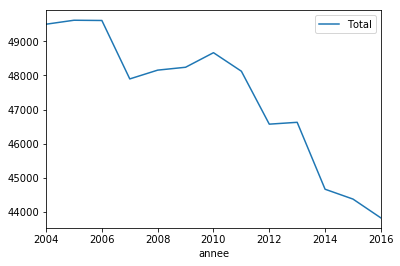

In [35]:
tmp_df = bourse.xs('Suisse', level = 'region', axis = 0)
tmp_df[['Total']].plot(kind = 'line')